In [1]:
import os
import shutil
import warnings

import numpy as np
import pandas as pd
import torchaudio

warnings.filterwarnings(action="ignore")
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
import json

import geopandas
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import soundfile
import tensorflow as tf
import torch

%matplotlib inline
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from torchaudio.transforms import MelSpectrogram
from tqdm import tqdm

In [2]:
SEED = 42
IMG_SIZE = 260
SAMPLE_RATE = 32000
N_FFT = 2048
SIGNAL_LENGTH = 5  # seconds
FREQ_MIN = 500
FREQ_MAX = 15000
MAX_AUDIO_FILES = 100
WIN_LENGHT = 1024
AUDIO_PATH = "/app/_data/train_short_audio/"
calls_to_drop = ["XC579430.ogg", "XC590621.ogg"]

In [3]:
train_metadata= pd.read_csv("/app/_data/train_metadata_full.csv")

In [7]:
HOP_LENGTH = int(
    32000 * 5 / (IMG_SIZE - 1))

In [33]:
min_max_dict={}
for path in train_metadata['file_path']:
    name = path.split('/')[-1]
    wave, sr = librosa.load(path, sr=SAMPLE_RATE)
    mel = librosa.feature.melspectrogram(
            wave,
            sr=SAMPLE_RATE,
            n_fft=2048,
            win_length=WIN_LENGHT,
            hop_length=HOP_LENGTH,
            n_mels=IMG_SIZE,
            fmin=FREQ_MIN,
            fmax=FREQ_MAX,
        )
    mel = librosa.power_to_db(mel)
    min_max_dict[name] = [mel.min(), mel.max()]

In [34]:
df = pd.DataFrame(min_max_dict).T

In [35]:
df.columns = ['min', 'max']

In [36]:
df

,min,max
XC109605.ogg,-74.466286,5.533711
XC11209.ogg,-65.819443,14.180557
XC127032.ogg,-92.770172,-12.770171
XC129974.ogg,-86.944679,-6.944676
XC129981.ogg,-78.272804,1.727196
...,...,...
XC591680.ogg,-89.220100,-9.220098
XC600085.ogg,-67.975037,12.024967
XC602701.ogg,-67.683960,12.316044
XC614733.ogg,-66.722282,13.277718


In [37]:
df['filename'] = df.index

In [38]:
df.to_csv('/app/_data/min_max_mel_db.csv', index=False)

In [39]:
df[['min', 'max']].describe()

,min,max
count,62874.000000,62874.000000
mean,-75.932284,3.933032
std,9.021403,9.469411
min,-100.000000,-100.000000
25%,-81.262318,-1.271007
50%,-74.125397,5.870295
75%,-69.032707,10.966664
max,-58.963268,21.036732


<AxesSubplot:>

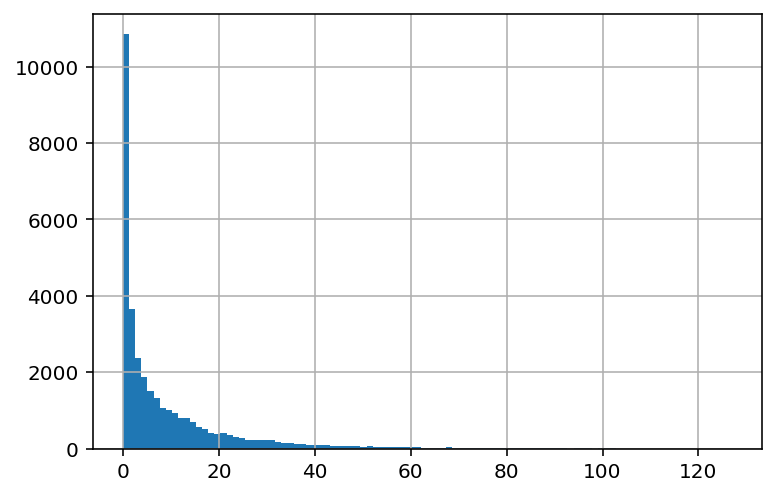

In [28]:
df['max'].hist(bins=100)

In [ ]:
df['max'].hist(bins=100)